**THE SPARKS FOUNDATION #GRIPJULY21**

**Author: B.K.KRISHNA PRANATHI, DATA SCIENCE & BUSINESS ANALYTICS INTERN**

**Task-8 Timeline Analysis : Covid-19 (Level - Advanced)**

**Objective: Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP**

**Dataset: https://bit.ly/30d2gdi**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

**Importing Data**

In [2]:
df = pd.read_csv("/content/owid-covid-data.csv")

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,3.791500e+04,37916.000000,37538.000000,3.465800e+04,34726.000000,37538.000000,37915.000000,37916.000000,37538.000000,34658.000000,34726.000000,37538.000000,31944.000000,5470.000000,5470.000000,5146.000000,5146.000000,332.000000,332.000000,559.000000,559.000000,1.574200e+04,1.505700e+04,15057.000000,15742.000000,18333.000000,18333.000000,17209.000000,16941.000000,7.544000e+03,7.237000e+03,6.074000e+03,6.204000e+03,1.318100e+04,7544.000000,7237.000000,6074.000000,13181.000000,33547.000000,4.004400e+04,37381.000000,35351.000000,35351.000000,35351.000000,35458.000000,22718.000000,36323.000000,37004.000000,26830.000000,26830.000000,18260.000000,32841.000000,37675.000000,35947.000000,1391.000000
mean,1.002874e+06,5475.045785,5485.268382,2.510792e+04,121.695502,111.945318,13845.129734,74.382311,74.471792,302.218728,1.474760,1.356515,0.990826,624.908227,23.686872,2886.440342,167.752836,466.142849,26.644154,2116.907982,126.933921,2.704202e+04,3.337968e+06,392.815872,2.841582,28017.647412,2.648176,0.100498,193.595980,4.626077e+07,2.066931e+07,1.081558e+07,9.066207e+05,4.275248e+05,31.514382,20.224970,13.059521,3658.053486,58.019465,1.376188e+08,173.913930,30.443897,9.032244,5.793160,16922.001326,12.714728,250.064460,7.679965,11.412814,31.530287,47.380137,2.973778,72.731598,0.720463,17.823300
std,4.922677e+06,26798.043433,26444.173172,1.058394e+05,521.686043,486.816439,25781.557650,168.413800,148.441590,508.514547,3.681446,2.804572,0.340138,1199.255706,29.599351,6110.717553,224.750452,815.479594,49.742733,3538.634260,221.198083,6.862061e+04,7.177087e+06,1009.232263,8.251262,59498.427476,7.050139,0.106159,932.075484,2.061439e+08,9.995848e+07,4.412486e+07,3.460960e+06,2.340345e+06,36.802975,21.420853,16.936640,5204.169410,20.925992,5.850919e+08,375.520543,9.281157,6.299633,4.323224,15586.251199,19.082704,110.717582,3.670811,11.610077,13.895953,33.271269,2.217345,7.866969,0.153238,31.443593
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1583.000000,-14.429000,0.001000,-681.958000,-29.757000,0.001000,-10.095000,-1.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.533500e+04,0.000000e+00,0.000000,-4.349000,0.000000,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,3.483000e+03,0.137000,16.700000,2.339000,1.337000,661.240000,0.200000,86.060000,0.990000,0.200000,7.700000,2.735000,0.300000,53.280000,0.397000,-44.950000
25%,1.717000e+03,2.000000,9.571000,6.300000e+01,0.000000,0.000000,327.736000,0.122000,1.674000,8.505000,0.000000,0.000000,0.830000,22.000000,2.900000,113.000000,21.396500,8.750000,2.252000,120.169000,11.303000,1.658250e+03,1.679030e+05,17.434000,0.148000,1850.000000,0.174000,0.017000,6.400000,1.294345e+05,9.123000e+04,6.081075e+04,5.212500e+03,5.960000e+02,3.140000,2.620000,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40044 entries, 0 to 40043
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               40044 non-null  object 
 1   continent                              37860 non-null  object 
 2   location                               40044 non-null  object 
 3   date                                   40044 non-null  object 
 4   total_cases                            37915 non-null  float64
 5   new_cases                              37916 non-null  float64
 6   new_cases_smoothed                     37538 non-null  float64
 7   total_deaths                           34658 non-null  float64
 8   new_deaths                             34726 non-null  float64
 9   new_deaths_smoothed                    37538 non-null  float64
 10  total_cases_per_million                37915 non-null  float64
 11  ne

In [6]:
df.shape

(40044, 60)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 60)


In [8]:
df.count()

iso_code                                 40044
continent                                37860
location                                 40044
date                                     40044
total_cases                              37915
new_cases                                37916
new_cases_smoothed                       37538
total_deaths                             34658
new_deaths                               34726
new_deaths_smoothed                      37538
total_cases_per_million                  37915
new_cases_per_million                    37916
new_cases_smoothed_per_million           37538
total_deaths_per_million                 34658
new_deaths_per_million                   34726
new_deaths_smoothed_per_million          37538
reproduction_rate                        31944
icu_patients                              5470
icu_patients_per_million                  5470
hosp_patients                             5146
hosp_patients_per_million                 5146
weekly_icu_ad

**Checking the Missing or Null values**

In [9]:
print(df.isnull().sum())

iso_code                                     0
continent                                 2184
location                                     0
date                                         0
total_cases                               2129
new_cases                                 2128
new_cases_smoothed                        2506
total_deaths                              5386
new_deaths                                5318
new_deaths_smoothed                       2506
total_cases_per_million                   2129
new_cases_per_million                     2128
new_cases_smoothed_per_million            2506
total_deaths_per_million                  5386
new_deaths_per_million                    5318
new_deaths_smoothed_per_million           2506
reproduction_rate                         8100
icu_patients                             34574
icu_patients_per_million                 34574
hosp_patients                            34898
hosp_patients_per_million                34898
weekly_icu_ad

In [10]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN


In [11]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-06-29,1654.0,40.0,24.0,NaN,NaN
2020-06-30,1654.0,0.0,24.0,NaN,NaN
2020-07-01,1654.0,0.0,24.0,NaN,NaN
2020-07-02,1654.0,0.0,24.0,NaN,NaN
2020-07-03,1765.0,111.0,25.0,NaN,NaN


Text(0.5, 0, 'Month')

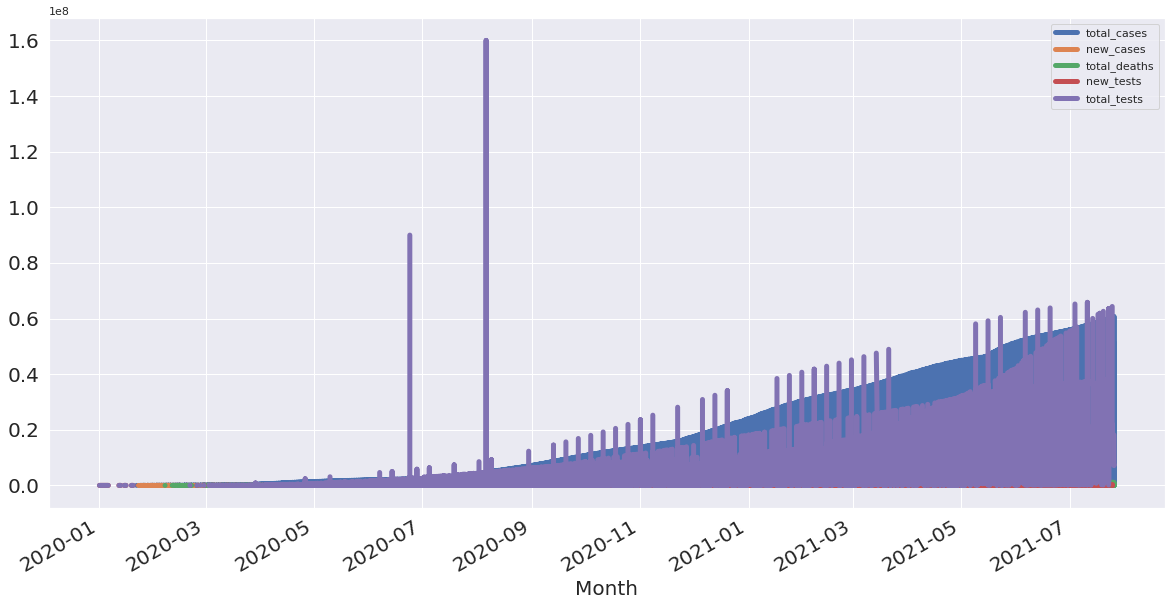

In [12]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

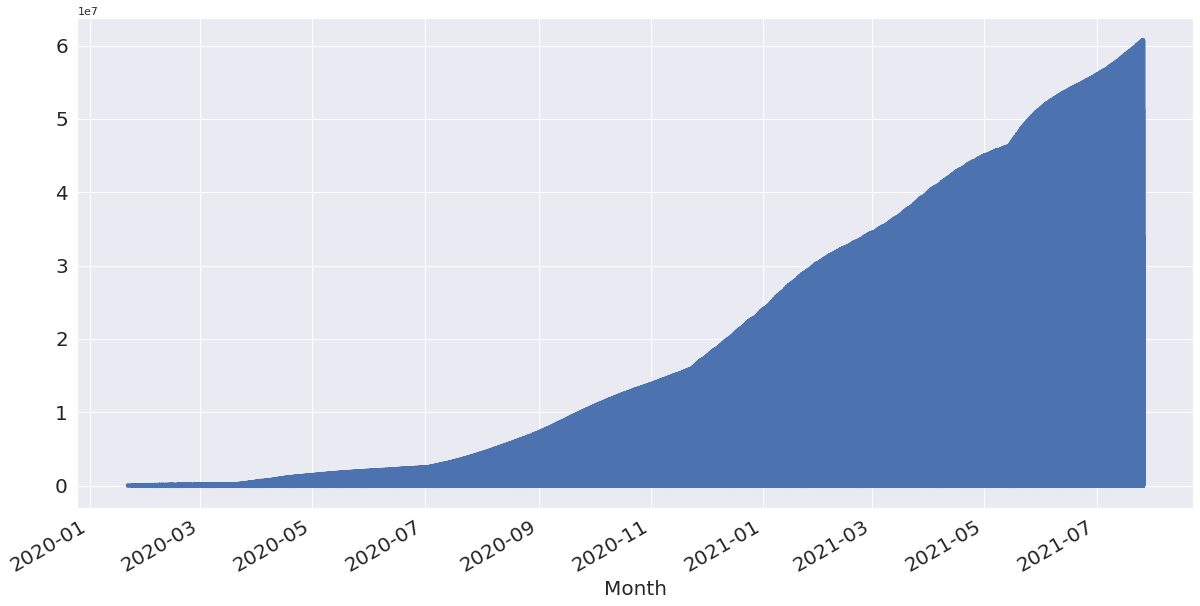

In [13]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

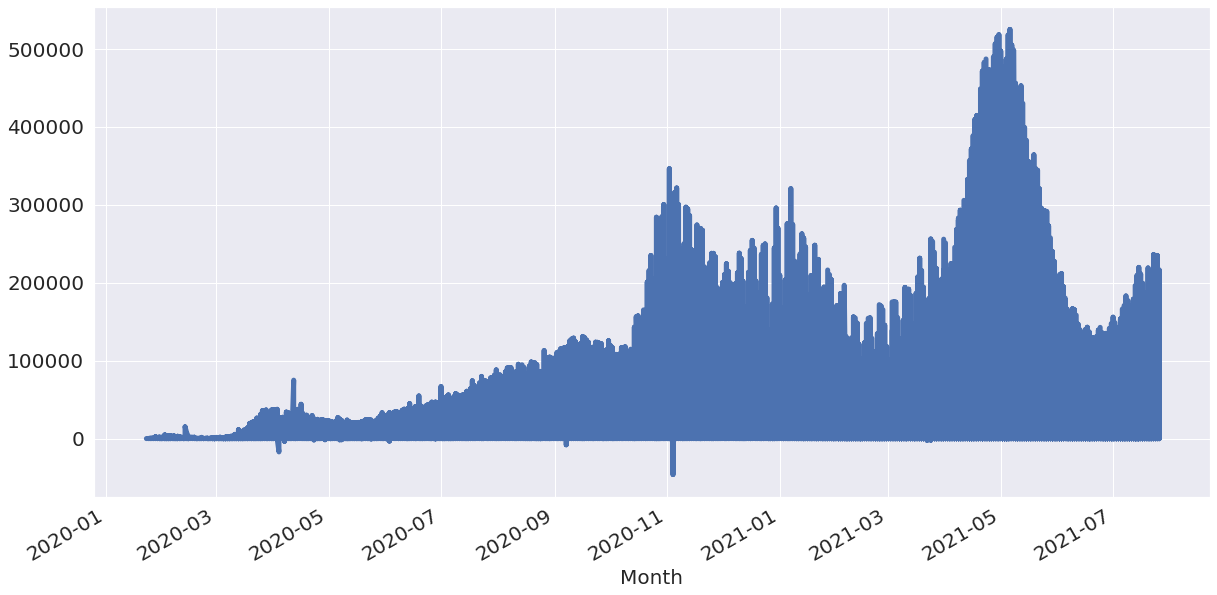

In [14]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

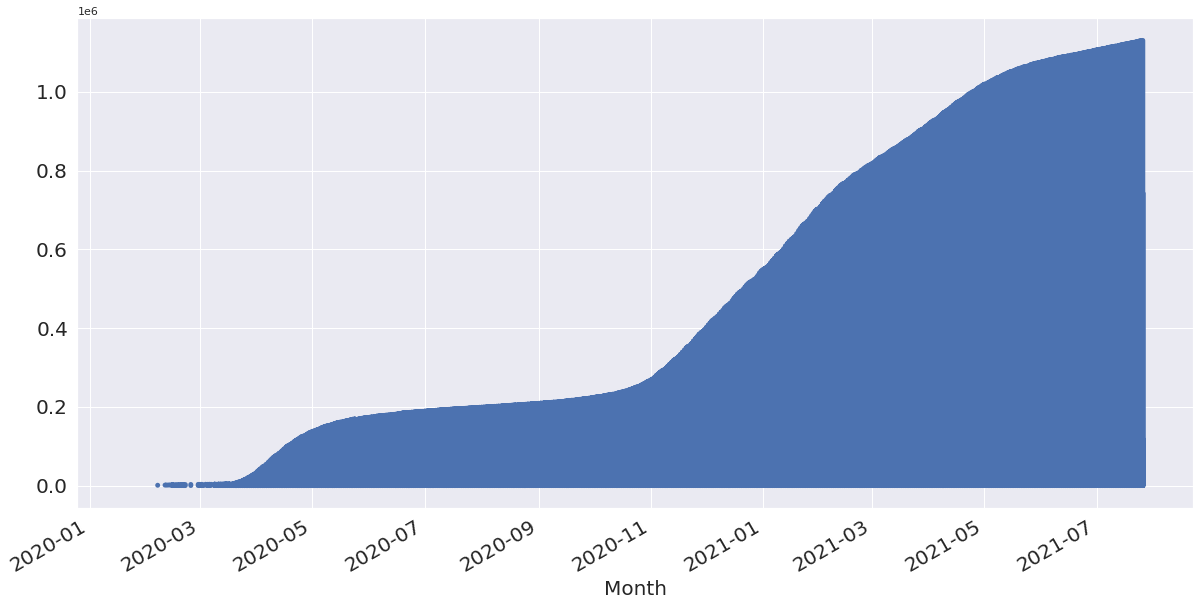

In [15]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

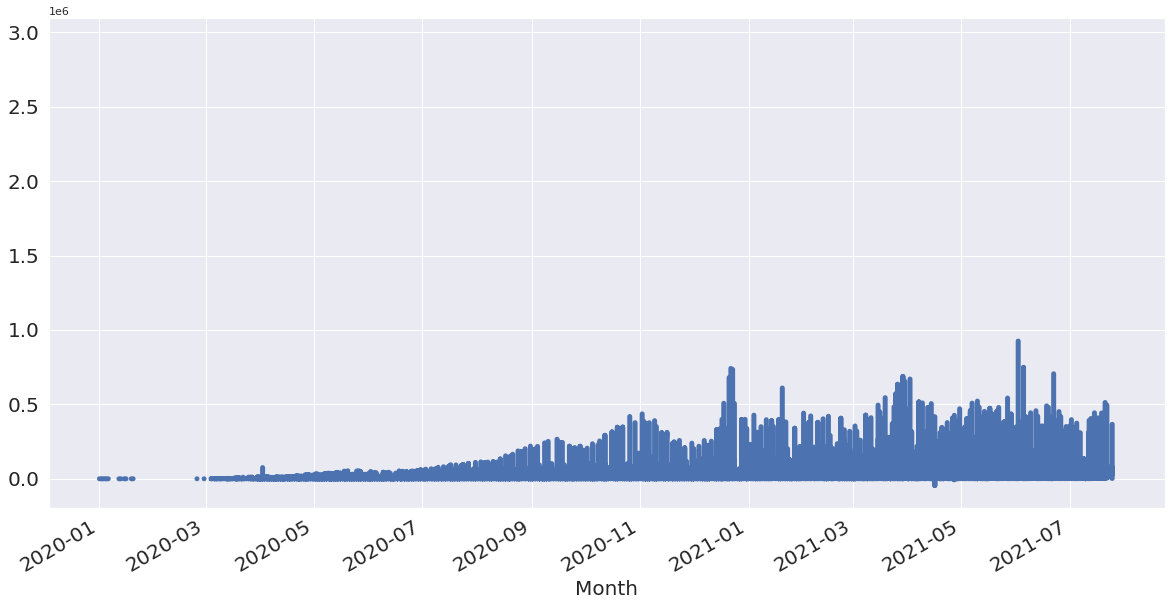

In [16]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

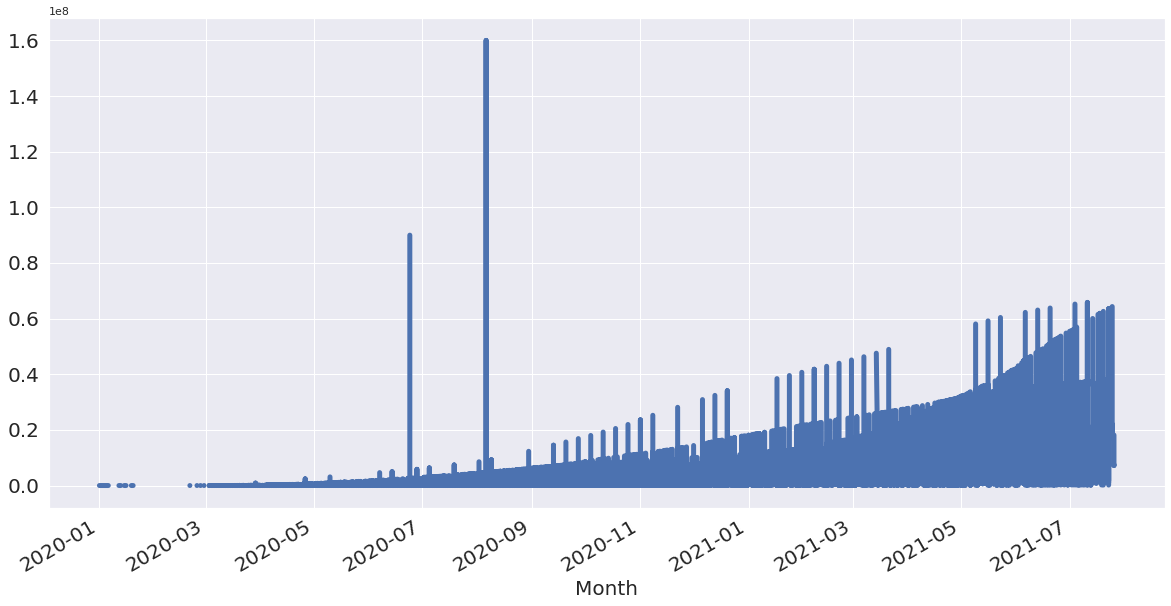

In [17]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

**Trends and Seasonality in TimeSeries Data**

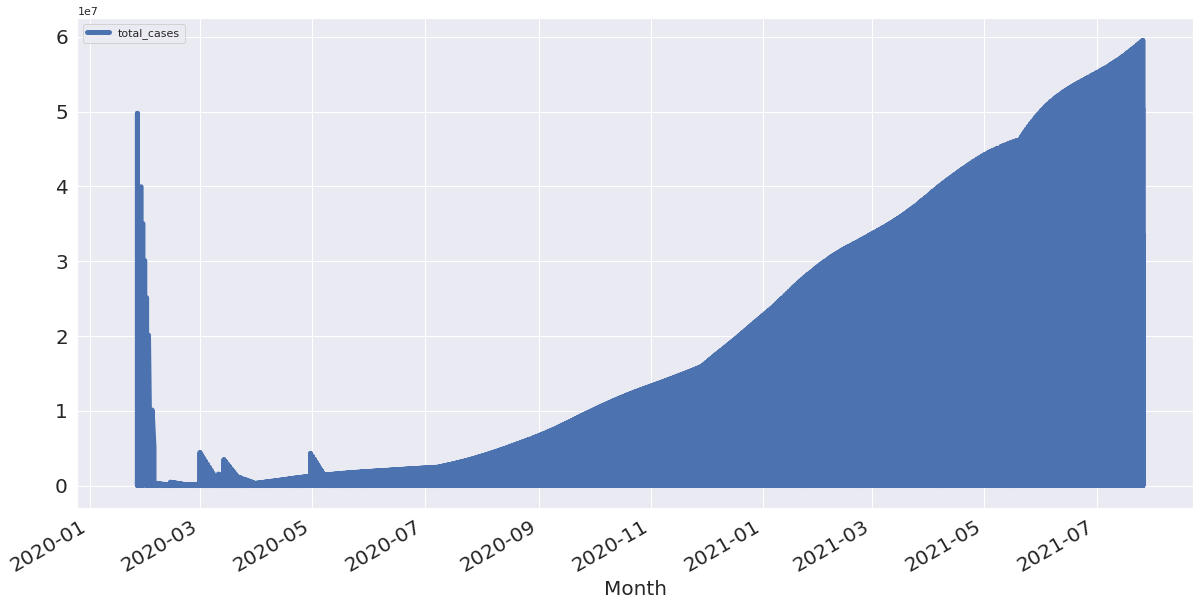

In [18]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

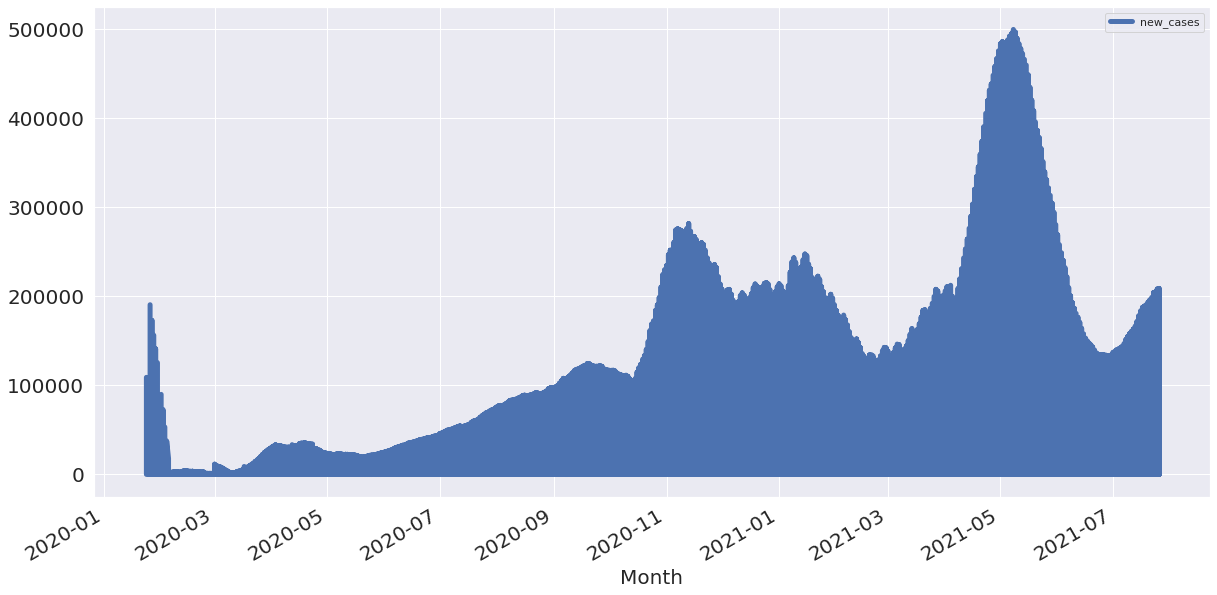

In [19]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

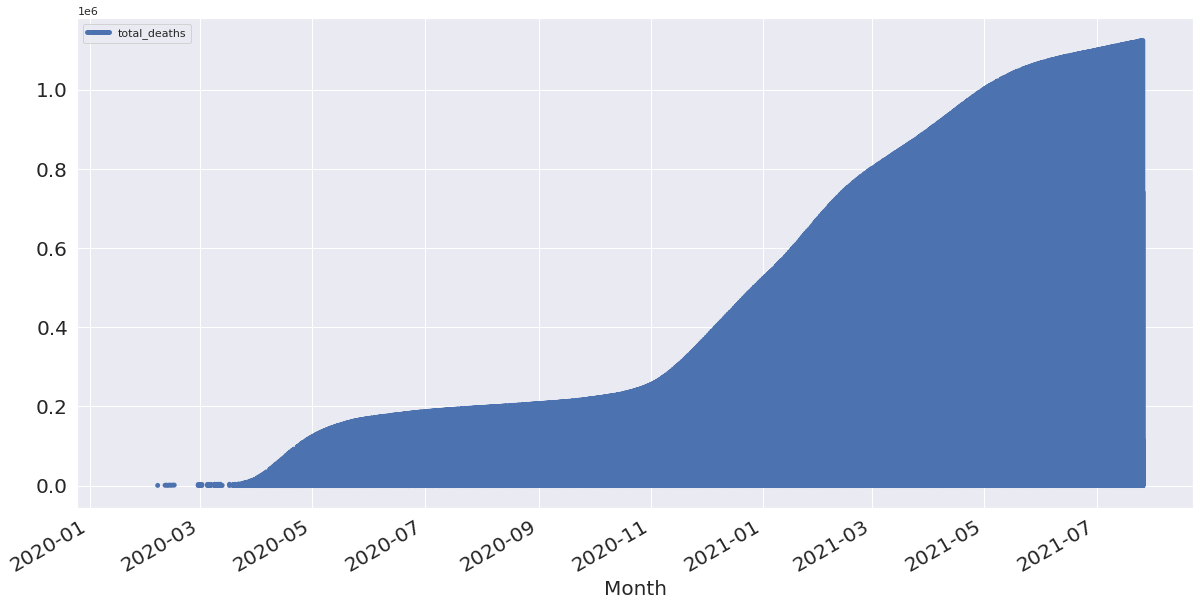

In [20]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

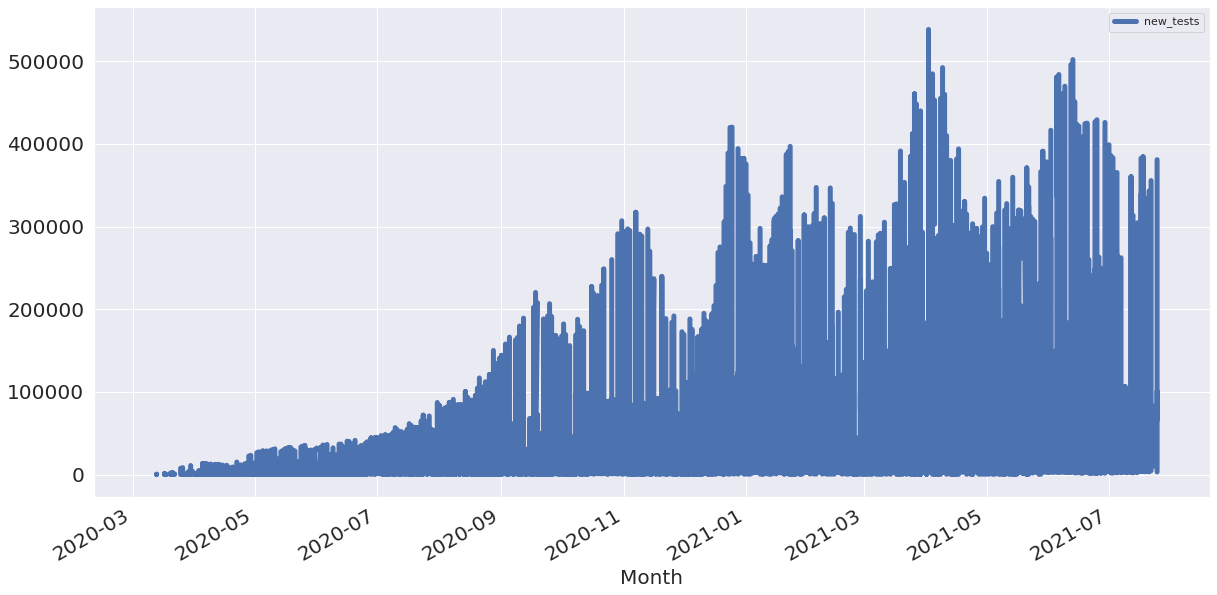

In [21]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

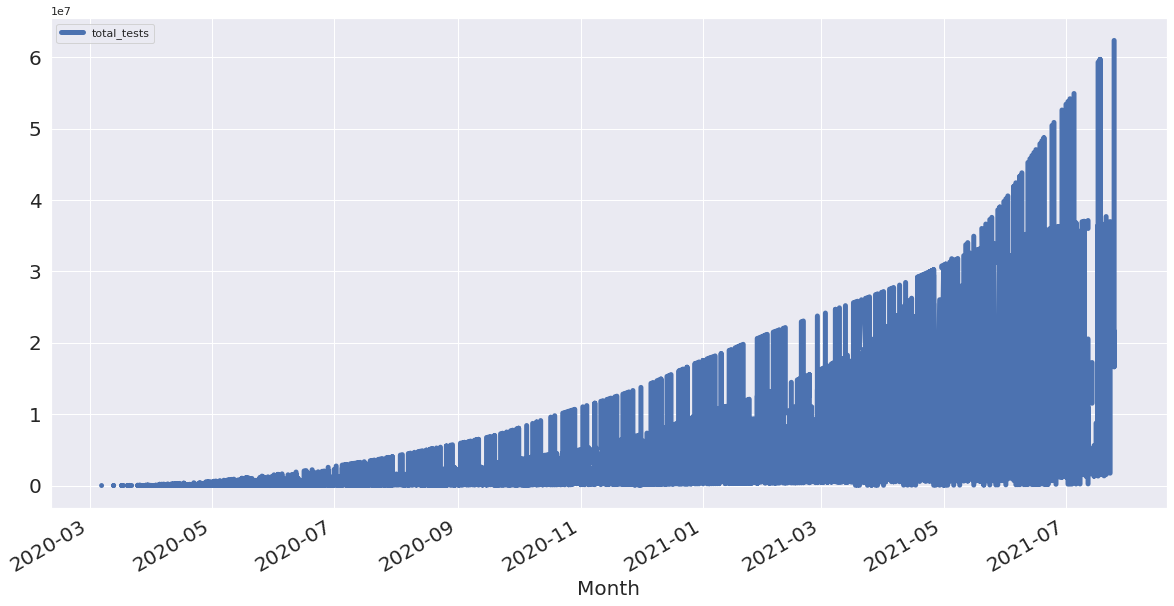

In [22]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

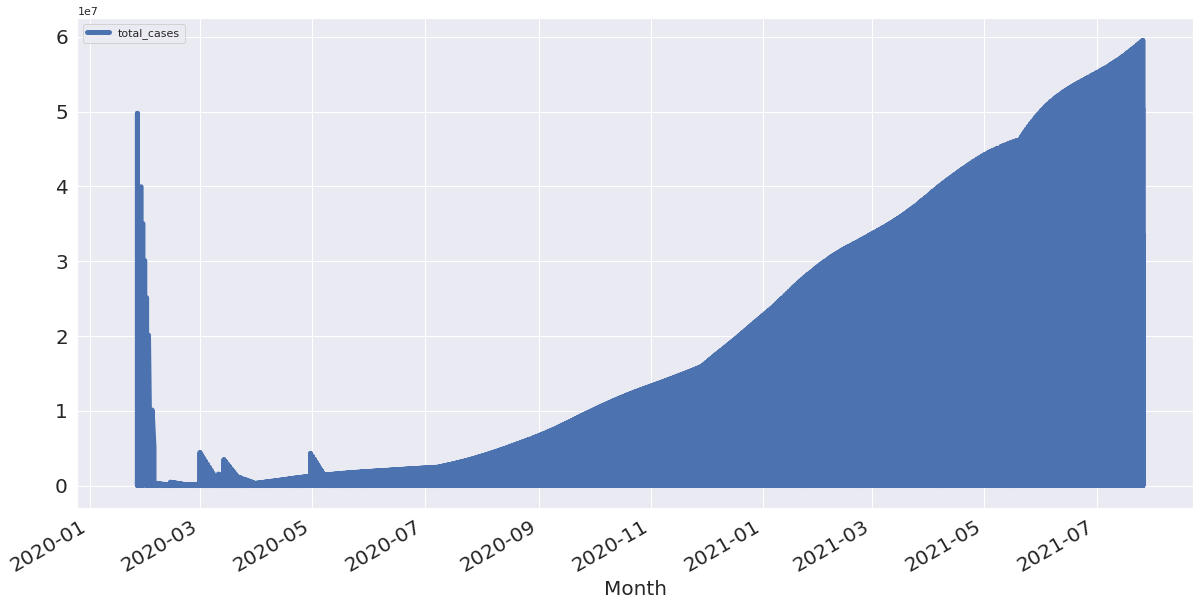

In [23]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);